## Titanic Machine learning challenge from Kaggle

### Competition Description

    The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

    One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

    In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


In [32]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

%matplotlib inline
sns.set()

## Data overview

The data has been split into two groups:

    training set (train.csv)
    test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

In [8]:
# import datasets
# Datasets are provided by Kaggle at https://www.kaggle.com/c/titanic/data

train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [11]:
#Visualization data
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data description
Data Dictionary
Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [16]:
# More info about data

#Look for missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [17]:
# View summary staticstics on training dataset
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visual exploratory data analysis

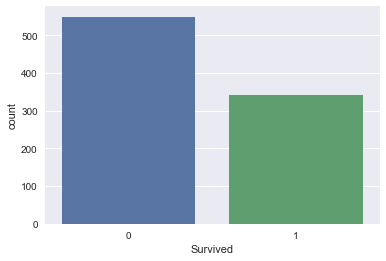

In [18]:
# Visualize how many survived on the train dataset
sns.countplot(x = "Survived", data = train_df)

Note that less people survived in this dataset.

In [21]:
# The test dataset does not contain the col "Survived". Let's create and assume that all did not survived
test_df['Survived'] = 0
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [88]:
# Let's submit to Kaggle and see how good is this absurd prediction. Remember to remove indexes otherwise Kaggle will complain.
test_df[['PassengerId', 'Survived']].to_csv('predictions/titanic_null_prediction.csv', index=False)

Kaggle score was:
0.62679

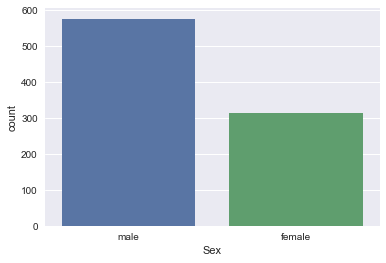

In [89]:
# Let's go further on knowing our dataset.
sns.countplot(x = 'Sex', data = train_df)

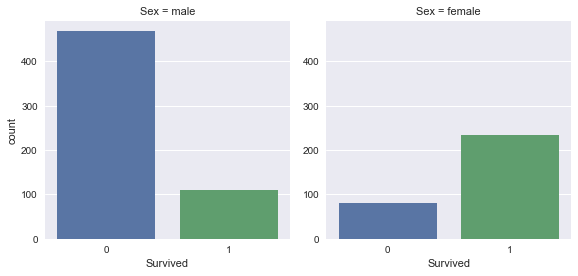

In [90]:
sns.factorplot(x = 'Survived', col ='Sex', kind='count',  data = train_df)

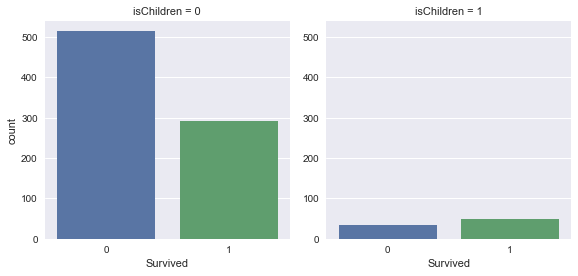

In [110]:
# We note that women are more likelly to survived. That might be expected because of the policy of "Women and children first'
# We can check also if it's related to age. Let's assume that children is any person younger than 15.
train_df['isChildren'] = np.where(train_df['Age']<=15, 1, 0 )
sns.factorplot(x = 'Survived', col ='isChildren', kind='count',  data = train_df)

In [111]:
# Get the numbers
train_df.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [112]:
train_df.groupby(['Survived']).isChildren.sum()

Survived
0    34
1    49
Name: isChildren, dtype: int64

In [113]:
#Proportion of men, women and children that survived

w =  train_df[train_df.Sex == 'female'].Survived.sum()/train_df[train_df.Sex == 'female'].Survived.count()
m = train_df[train_df.Sex == 'male'].Survived.sum()/train_df[train_df.Sex == 'male'].Survived.count()
c = train_df[train_df.isChildren == 1].Survived.sum()/train_df[train_df.isChildren == 1].Survived.count()
print('Survival:')
print('Women: %6.2f' % w)
print('Man: %6.2f' % m)
print('Children: %6.2f' % c)

# There is overlap between children and male/female
# Let's remove this overlap


Survival:
Women:   0.74
Man:   0.19
Children:   0.59


In [114]:
train_df_adults = train_df[train_df['isChildren'] == 0]
train_df_children = train_df[train_df['isChildren'] == 1]

#Proportion of men, women and children that survived

w =  train_df_adults[train_df_adults.Sex == 'female'].Survived.sum()/train_df_adults[train_df_adults.Sex == 'female'].Survived.count()
m = train_df_adults[train_df_adults.Sex == 'male'].Survived.sum()/train_df_adults[train_df_adults.Sex == 'male'].Survived.count()
c = train_df_children.Survived.sum()/train_df_children.Survived.count()
print('Survival:')
print('Women: %6.2f' % w)
print('Man: %6.2f' % m)
print('Children: %6.2f' % c)

Survival:
Women:   0.76
Man:   0.16
Children:   0.59


In [130]:
## Hardcoding this info in the test data

# Children all children survived. If not children, women survived.
test_df['Survived'] = np.where(test_df['Age'] <=15, 1, test_df.Sex == 'female')
test_df[['PassengerId', 'Survived']].to_csv('./predictions/titanic_female_children_survived.csv', index=False)

test_df.head(10)

# Kaggle 


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


1s Kaggle submission: Kaggle score was  0.62679

2nd Kaggle submission: Kaggle score was 0.76076

## Modelling


In [136]:
# Concatenate both datasets
data = pd.concat([train_df.drop(['Survived'], axis = 1), test_df.drop(['Survived'], axis = 1)])
#data.tail(10)
data = pd.get_dummies(data, columns=['Sex'], drop_first = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Ticket         1309 non-null object
isChildren     891 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [150]:
# Lots of missing values. LEt's assume that the missing Age is the median age
data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())
data = data[['Sex_male', 'Age', 'Fare', 'Pclass', 'SibSp']]
data.head()

,Sex_male,Age,Fare,Pclass,SibSp
0,1,22.0,7.2500,3,1
1,0,38.0,71.2833,1,1
2,0,26.0,7.9250,3,0
3,0,35.0,53.1000,1,1
4,1,35.0,8.0500,3,0


In [158]:
# Re-Split data in training and test dataset

data_train = data.iloc[:train_df.shape[0]]
data_test = data.iloc[train_df.shape[0]:]
data.head(10)

,Sex_male,Age,Fare,Pclass,SibSp
0,1,22.0,7.2500,3,1
1,0,38.0,71.2833,1,1
2,0,26.0,7.9250,3,0
3,0,35.0,53.1000,1,1
4,1,35.0,8.0500,3,0
5,1,28.0,8.4583,3,0
6,1,54.0,51.8625,1,0
7,1,2.0,21.0750,3,3
8,0,27.0,11.1333,3,0
9,0,14.0,30.0708,2,1


In [163]:
# Start building model with Scikit Learn

x = data_train.values
test = data_test.values
y = train_df.Survived.values


In [164]:
# We will use a decision tree classifier
classifier = tree.DecisionTreeClassifier(max_depth = 3)
classifier.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [165]:
# Make predictions
y_pred = classifier.predict(test)
# Store the data into the dataframe
test_df['Survived'] = y_pred

In [167]:
# Save and submit to Kaggle the new model
test_df[['PassengerId', 'Survived']].to_csv('./predictions/titanic_decision_tree.csv', index = False)

3rd Kaggle submission: Kaggle score was 0.77990


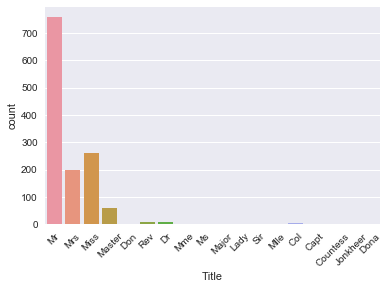

In [241]:
# Extracting the titles of the passengers to test if social status increases chances of survival

# Re-import data and load modules
import re
# Import data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

# Store target variable of training data in a safe place
survived_train = df_train.Survived

# Concatenate training and test sets
data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])


# Extract Title from Name, store in column and plot barplot
data['Title'] = data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);

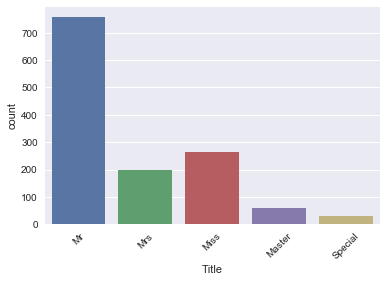

In [242]:
#simplify titles
data['Title'] = data['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
data['Title'] = data['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);

In [243]:
data['hasCabin'] = ~data.Cabin.isnull()
data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,hasCabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,False
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,True
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,False
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,False
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,False


In [244]:
# Drop useless cols
data.drop(['Name', 'PassengerId', 'Cabin', 'Ticket'], axis=1, inplace = True)
data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,hasCabin
0,3,male,22.0,1,0,7.2500,S,Mr,False
1,1,female,38.0,1,0,71.2833,C,Mrs,True
2,3,female,26.0,0,0,7.9250,S,Miss,False
3,1,female,35.0,1,0,53.1000,S,Mrs,True
4,3,male,35.0,0,0,8.0500,S,Mr,False
5,3,male,NaN,0,0,8.4583,Q,Mr,False
6,1,male,54.0,0,0,51.8625,S,Mr,True
7,3,male,2.0,3,1,21.0750,S,Master,False
8,3,female,27.0,0,2,11.1333,S,Mrs,False
9,2,female,14.0,1,0,30.0708,C,Mrs,False


In [245]:
# Filling missing data again, also using the median
data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())
data['Embarked'] = data.Embarked.fillna('S')
data.info()
# No missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Fare        1309 non-null float64
Embarked    1309 non-null object
Title       1309 non-null object
hasCabin    1309 non-null bool
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 93.3+ KB


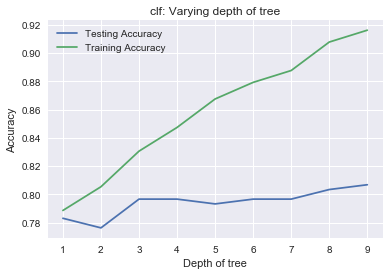

In [246]:
# Test max_depth parameter

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42, stratify=y)

# Setup arrays to store train and test accuracies
dep = np.arange(1, 10)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a k-NN Classifier with k neighbors: knn
    classifier = tree.DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    classifier.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = classifier.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = classifier.score(x_test, y_test)

# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

In [247]:
#Categoriszing data
#?pd.qcut
data['Age'] = pd.qcut(data.Age, 4, labels=False)
data['Fare'] = pd.qcut(data.Fare, 4, labels=False)
data.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,hasCabin
0,3,male,0,1,0,0,S,Mr,False
1,1,female,3,1,0,3,C,Mrs,True
2,3,female,1,0,0,1,S,Miss,False
3,1,female,2,1,0,3,S,Mrs,True
4,3,male,2,0,0,1,S,Mr,False


In [248]:
#Transform all data to numerical
data_dummy = pd.get_dummies(data, drop_first = True)
data_dummy.head()

,Pclass,Age,SibSp,Parch,Fare,hasCabin,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,3,0,1,0,0,False,1,0,1,0,1,0,0
1,1,3,1,0,3,True,0,0,0,0,0,1,0
2,3,1,0,0,1,False,0,0,1,1,0,0,0
3,1,2,1,0,3,True,0,0,1,0,0,1,0
4,3,2,0,0,1,False,1,0,1,0,1,0,0


In [250]:
# Split into test.train
#891 is the position where the datasets where mergerd
data_train = data_dummy.iloc[:891]
data_test = data_dummy.iloc[891:]

# Transform into arrays for scikit-learn
X = data_train.values
test = data_test.values
y = survived_train.values

In [252]:
# Perform a grid search for parameters for the model
from sklearn.model_selection import GridSearchCV

dep = np.arange(1,10)
param_grid = {'max_depth': dep} # as dictionary


# Decision tree classifier
classifier = tree.DecisionTreeClassifier()

# Initiate the GridSearchCV

classifier_cv = GridSearchCV(classifier, param_grid = param_grid, cv=5)

# Fit to data
classifier_cv.fit(X,y)

# Print the tuned parameter and score
print("Tuned Decision Tree Parameters: {}".format(classifier_cv.best_params_))
print("Best score is {}".format(classifier_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 3}
Best score is 0.8271604938271605


In [253]:
Y_pred = classifier_cv.predict(test)
test_df['Survived'] = Y_pred

test_df[['PassengerId', 'Survived']].to_csv('./predictions/titanic_grid_tree.csv', index = False)